# Polynomial Regression

What if your data doesn't look linear at all?

## Nomial formulas
The higher the order, the more curves are in the line.

### Linear
`y = mx + b`
### Second-Order Polynomial
`y = ax(squared) + bx + c`: One curve
### Third-Order Polynomial
`y = ax(cubed) + bx(squared) + cx + d`: Two curves
....etc

## Beware Overfitting
- many curves don't always reveal meaningful trends
- A High "R-squared" value is not necessarily a good predictor - it fits the data well, but new data may be unpredictable
- Training & Testing is a more "principled" way to detect over-fitting of a best-fit line

## Imports

In [1]:
%matplotlib inline
from pylab import *
import numpy as np
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

## Generate Some Random Data

Text(0, 0.5, 'Purchase Amount')

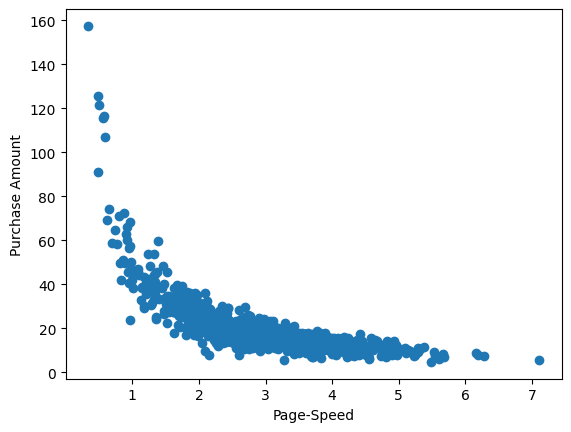

In [7]:
POINT_COUNT = 1000 
np.random.seed(2)
pageSpeeds = np.random.normal(3.0, 1.0, POINT_COUNT)
purchaseAmount = np.random.normal(50.0, 10.0, POINT_COUNT) / pageSpeeds

# pageSpeeds are on the x
# purchaseAmount is on the Y
scatter(pageSpeeds, purchaseAmount)
xlabel('Page-Speed')
ylabel('Purchase Amount')

## Create A Polynomial function
numpy has a handy polyfit function we can use, to let us construct an nth-degree polynomial model of our data that minimizes squared error. Let's try it with a 4th degree polynomial:

In [3]:
pageSpeedArr = np.array(pageSpeeds)
purchaseAmountArr = np.array(purchaseAmount)

NOMIAL_COUNT = 4

# PolyFit
# https://numpy.org/doc/stable/reference/generated/numpy.polyfit.html
# "Least squares polynomial fit"
polyFitVals = np.polyfit(pageSpeedArr, purchaseAmountArr, NOMIAL_COUNT)

# poly1d
# https://numpy.org/doc/stable/reference/generated/numpy.poly1d.html
# "A one-dimensional polynomial class"
p4 = np.poly1d(polyFitVals)

We'll visualize our original scatter plot, together with a plot of our predicted values using the polynomial for page speed times ranging from 0-7 seconds:

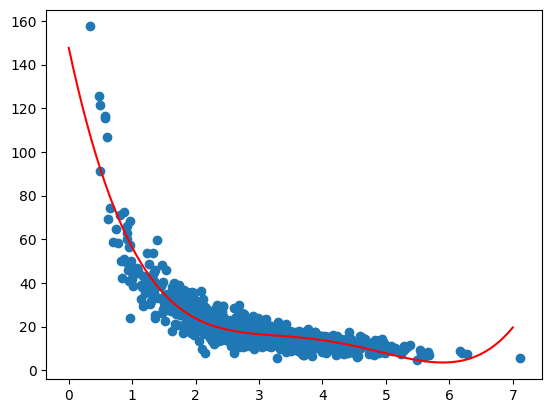

In [4]:
# linspace
# https://numpy.org/doc/stable/reference/generated/numpy.linspace.html
# "Return evenly spaced numbers over a specified interval"
# start, stop, number-of-samples
evenlySpacedValues = np.linspace(0, 7, 100)

# plot points
plt.scatter(pageSpeedArr, purchaseAmountArr)

# plot best-fit line
plt.plot(evenlySpacedValues, p4(evenlySpacedValues), c='r')

plt.show()

Looks pretty good! Let's measure the r-squared error:

In [5]:
r2 = r2_score(purchaseAmountArr, p4(pageSpeedArr))

print(r2)

0.8293766396303073


## Methodical Polynomical Comparison

Goal: figure out which polynomial "best" fits the data*
- pick a list of polynomials to try: [2,3,4,5,6,7]
- for each of those...
  - create a polynomial function
  - apply it to the data
  - get the r2 value given the data and the polyFunction
  - store & "compare" the r2 values to get the highest r2 value
  - log the highest r2 value and the polynomial count
 
_hmm....beware over-fitting..._

--------------
testing nomial 2:
so far, nomial 2 is the highest r-squared at 0.6927446350535893 - color tab:blue
--------------
--------------
testing nomial 3:
so far, nomial 3 is the highest r-squared at 0.7842354030823269 - color tab:orange
--------------
--------------
testing nomial 4:
so far, nomial 4 is the highest r-squared at 0.8293766396303073 - color tab:green
--------------
--------------
testing nomial 5:
so far, nomial 5 is the highest r-squared at 0.8553884386186104 - color tab:red
--------------
--------------
testing nomial 6:
so far, nomial 6 is the highest r-squared at 0.8700733999871759 - color tab:purple
--------------
--------------
testing nomial 7:
so far, nomial 7 is the highest r-squared at 0.877836978171209 - color tab:brown
--------------


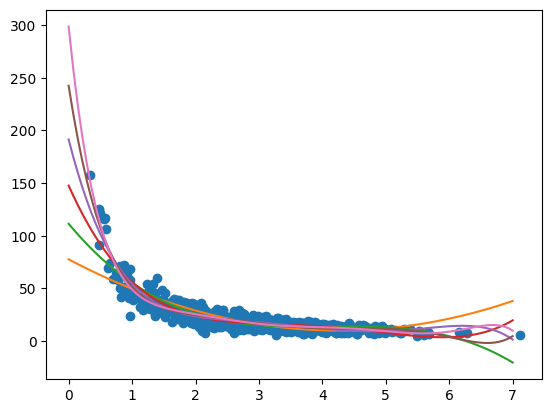

In [6]:
nomialsToTest = [2,3,4,5,6,7]
# nomialsToTest = [4]
nomialScores = []
highestRSquaredScore = 0

tableau_color_keys = list(mcolors.TABLEAU_COLORS.keys())

# plot points
plt.scatter(pageSpeedArr, purchaseAmountArr)

# 
# color logging
# 
# print(mcolors.TABLEAU_COLORS)
# print(f'KEY: {tableau_color_keys[1]} - {mcolors.TABLEAU_COLORS[tableau_color_keys[1]]}')

# loop & print polynomial lines
for nomialIdx, nomial in enumerate(nomialsToTest):
  print('--------------')
  print(f'testing nomial {nomial}:')
  pfVals = np.polyfit(pageSpeedArr, purchaseAmountArr, nomial)
  polyFn = np.poly1d(pfVals)
  rSquaredVal = r2_score(purchaseAmountArr, polyFn(pageSpeedArr))
  if rSquaredVal > highestRSquaredScore: print(f'so far, nomial {nomial} is the highest r-squared at {rSquaredVal} - color {tableau_color_keys[nomialIdx]}')
  plt.plot(evenlySpacedValues, polyFn(evenlySpacedValues), c=mcolors.TABLEAU_COLORS[tableau_color_keys[nomialIdx + 1]])
  print('--------------')
plt.show()